<a href="https://colab.research.google.com/github/01DaisyLynn/Factors-that-affect-housing-prices/blob/main/Regression_modeling_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOUSING DATASET**

## Defining the question

### a) ***Data Analytic question***

Determine which regression model will provide best prediction on the factors affecting housing prices

### b) ***Metric of success***

Model is considered prefereable if its predicted value is lower than the initial value

### c) ***Context***

HassConsult Limited was formed in 1992 with a vision to establish a comprehensive Real Estate firm that reinvented the market patterns 

### d) ***Expremimental Design***

1.  Defining the Question 

2.  Reviewing dataset

3.  Data Cleaning

4.  Exploratory Analysis

5.  Multicollonearity

6.  Modelling


## Reviewing Dataset

*importing libraries*

In [1]:
#Importing Pandas
import pandas as pd

#importing numpy
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt

#importing seaborn
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

In [3]:
#loading dataset
housing = pd.read_csv('/content/Housing_Dataset.csv')
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#getting the shape of our dataset
housing.shape

#the dataset has 21613 rows and 20 columns

(21613, 20)

In [5]:
#checking if the data types 
housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#statistical description of our numerical variables
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Checking columns
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
#Checking for any duplicates
housing.duplicated().any()

True

In [9]:
#Checking for sum of duplicates
housing.duplicated().sum()

3

In [10]:
#Checking for missing values
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There's no presence of null values

## Data cleaning

In [11]:
#Dropping the duplicated columns
housing.drop_duplicates(keep='first', inplace = True)

In [12]:
#Checking if the duplicates have been dropped
housing.duplicated().sum()

0

Duplicated column have been removed, no presence of duplicates

In [13]:
#dropping columns
housing.drop(['id'], axis = 1, inplace = True)
housing.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


Column was dropped since its irrelevant to our research

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


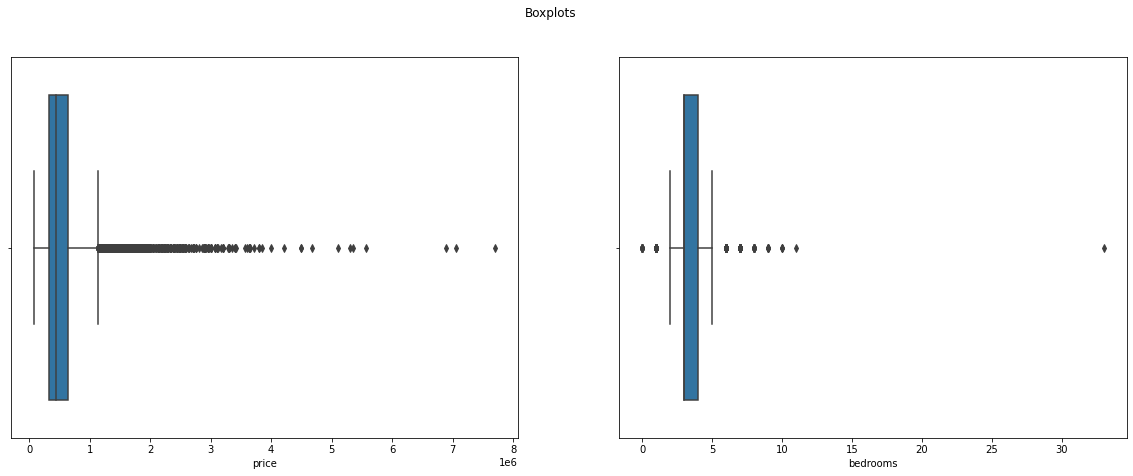

In [14]:
#checking for outliers
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(housing['price'], ax=ax1)
sns.boxplot(housing['bedrooms'], ax=ax2)
plt.show()

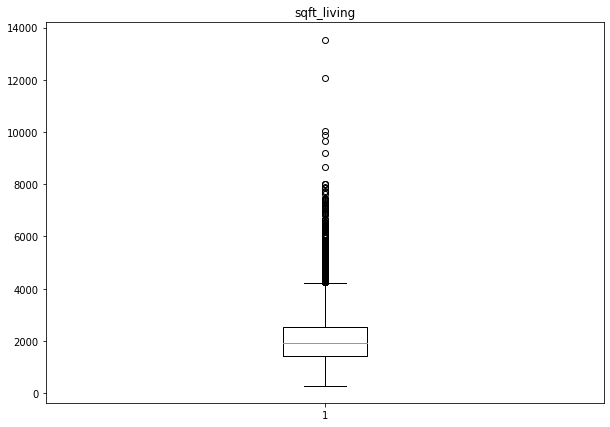

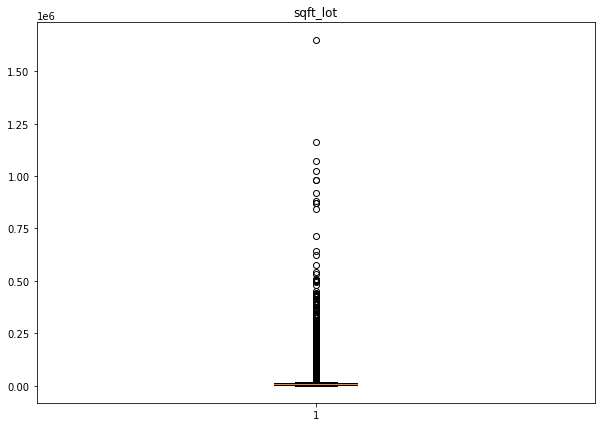

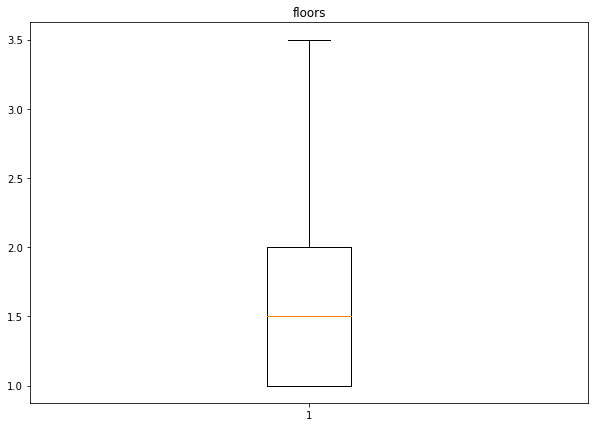

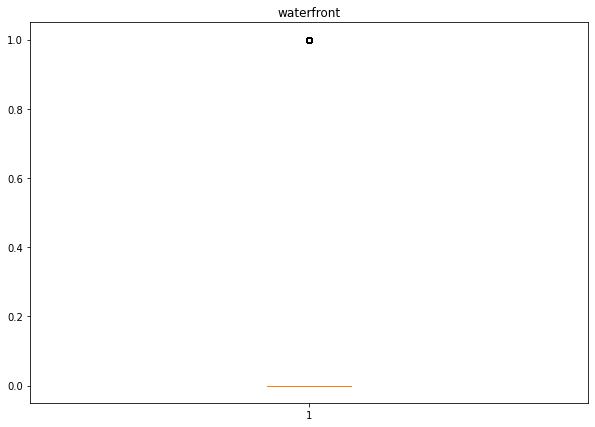

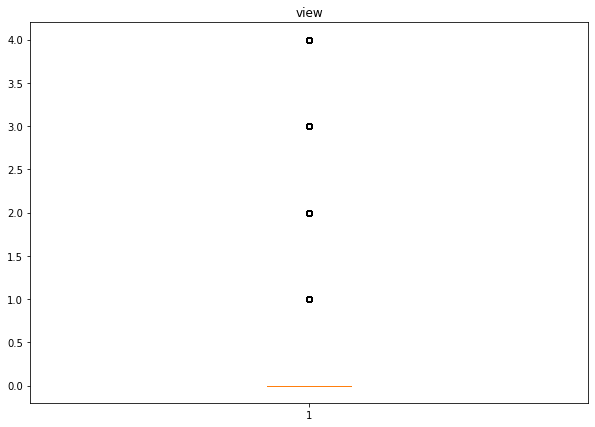

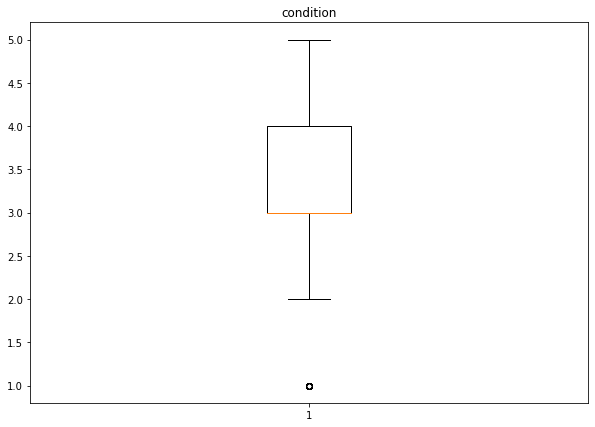

In [15]:
#Checking for outliers
col=['sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition']
for i in col:
  fig=plt.figure(figsize = (10,7))
  plt.boxplot(housing[i])
  plt.title(i)
  plt.show()

There is presence of outliers but they wont be dropped since every value gives importance to our independent variables while adding onto the results

## Exploratory Data Analysis

### ***Univariate Analysis***

In [16]:
#frequency table for bedrooms variable
housing.bedrooms.value_counts()

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

from the above results we can see how many house have acertain number of bedrooms e.g 9822 houses have 3 bedrooms

In [17]:
#frequency table for floors variable
housing.floors.value_counts()

1.0    10680
2.0     8238
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [18]:
# Finding the measures of central tendencies in the numerical columns

numerical_columns = 'price', 'bedrooms', 'bathrooms','sqft_living','sqft_lot', 'floors','waterfront','view'

for column in numerical_columns:
  print('\n')
  print(column + ', Mean: '+ str(housing[column].mean()))
  print(column + ', Mode: '+ str(housing[column].mode()))
  print(column + ', Median: '+ str(housing[column].median()))
  print(column + ', Standard deviation: '+ str(housing[column].std()))
  print(column + ', Variance: '+ str(housing[column].var()))
  print(column + ', Skewness: '+ str(housing[column].skew()))
  print(column + ', Kurtosis: '+ str(housing[column].kurt()))



price, Mean: 540178.9448403517
price, Mode: 0    350000.0
1    450000.0
dtype: float64
price, Median: 450000.0
price, Standard deviation: 367387.58505388984
price, Variance: 134973637651.72916
price, Skewness: 4.021467451317612
price, Kurtosis: 34.517437729615054


bedrooms, Mean: 3.370846830171217
bedrooms, Mode: 0    3
dtype: int64
bedrooms, Median: 3.0
bedrooms, Standard deviation: 0.9301096999846462
bedrooms, Variance: 0.8651040540055286
bedrooms, Skewness: 1.9742435470953739
bedrooms, Kurtosis: 49.06010825423431


bathrooms, Mean: 2.114738546968996
bathrooms, Mode: 0    2.5
dtype: float64
bathrooms, Median: 2.25
bathrooms, Standard deviation: 0.770203702285374
bathrooms, Variance: 0.593213743014097
bathrooms, Skewness: 0.5111642830477003
bathrooms, Kurtosis: 1.2796371646131974


sqft_living, Mean: 2079.881212401666
sqft_living, Mode: 0    1300
dtype: int64
sqft_living, Median: 1910.0
sqft_living, Standard deviation: 918.5002986169898
sqft_living, Variance: 843642.7985594993
sqft

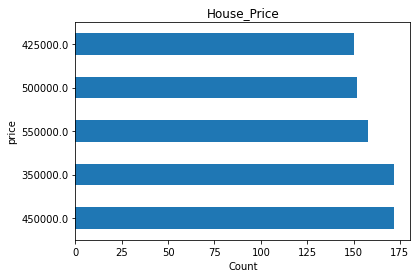

In [19]:
#Bargraph showcasing the price offered
housing['price'].value_counts().head().plot(kind= 'barh');

plt.xlabel("Count")
plt.ylabel("price")

# Giving a title to our Bar chart
plt.title("House_Price");

### ***Bivariate analysis***

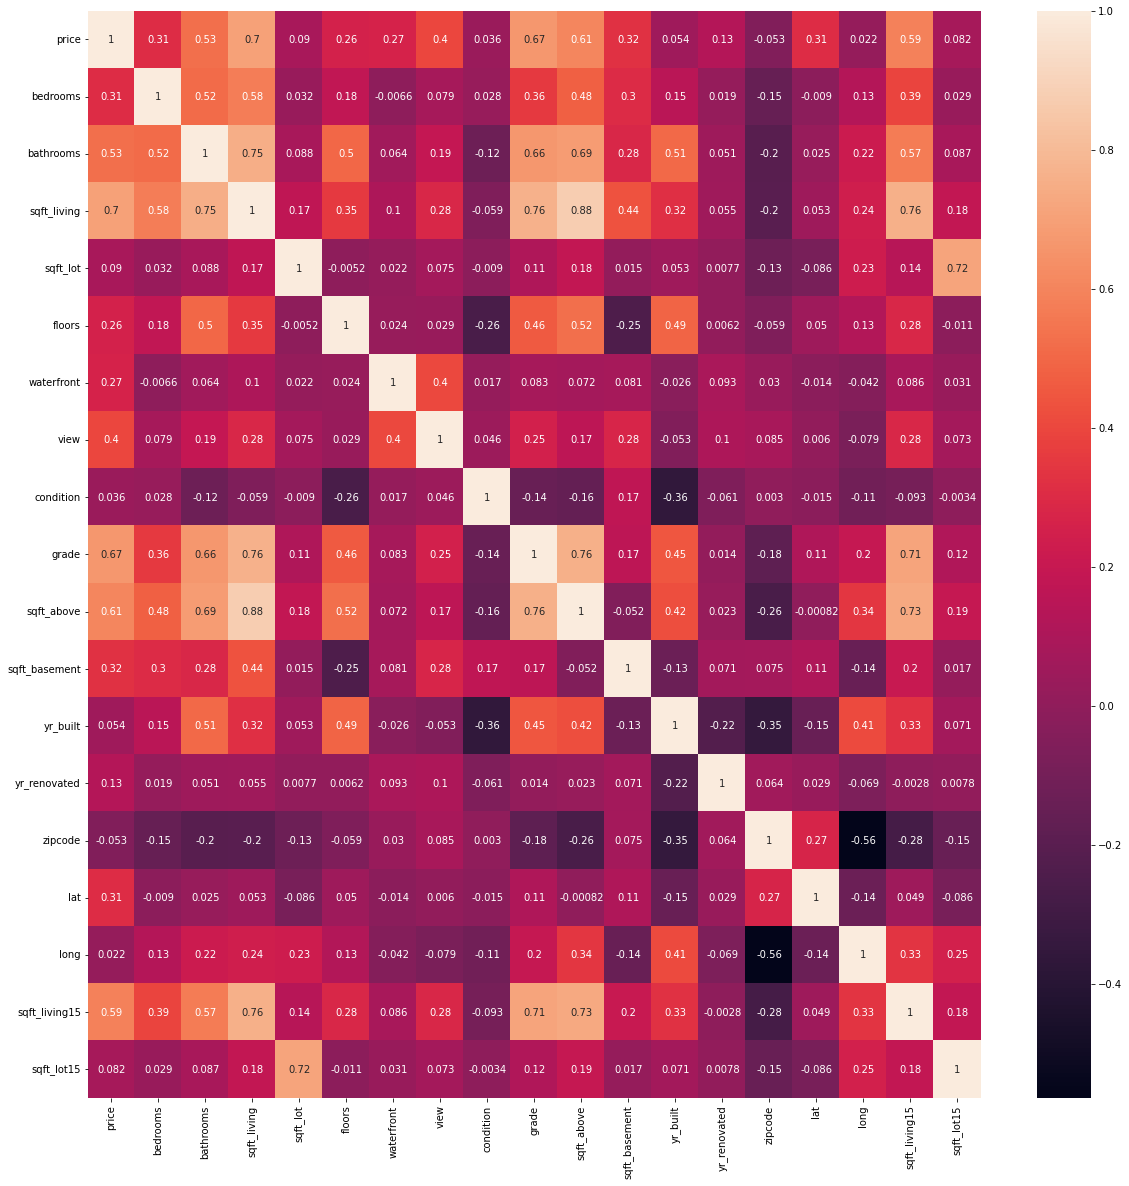

In [20]:
#Checking the correlation using a heatmap

fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(housing.corr(),annot=True)
plt.show()

## Multicollonearity

In [21]:
correlations =housing.corr()

correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265


In [22]:
#computing VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,3.331173,0.301655,-0.286931,-5.094804e+00,-0.048127,-0.033169,-0.457060,-0.368445,-0.156087,-1.023070,3.235024e+00,1.853005e+00,0.698362,-0.072940,0.282685,-0.757544,0.274226,-0.134816,0.094664
bedrooms,0.301655,1.679476,-0.487409,-1.637381e-01,0.044969,0.046845,0.021689,0.081065,-0.064768,0.214297,-8.361820e-01,-4.413851e-01,0.197749,0.039194,0.105772,-0.017761,0.042386,0.013076,0.093988
bathrooms,-0.286931,-0.487409,3.375963,-5.111615e-01,-0.019888,-0.672552,0.049466,-0.010651,-0.123821,-0.179805,-6.438041e-01,-7.696668e-01,-0.995898,-0.254153,0.017440,0.024171,0.030121,0.103633,0.063290
sqft_living,-5.084469,-0.179701,-0.586507,2.265771e+14,-0.141996,0.102693,1.016117,-0.525604,-0.085278,4.273818,-2.042866e+14,-1.091805e+14,-2.022415,0.096560,0.093595,0.495850,-0.454263,2.577075,0.204563
sqft_lot,-0.048127,0.044969,-0.019888,-1.343431e-01,2.103222,0.045660,0.033972,-0.053786,0.032777,-0.039084,-5.965648e-02,3.127748e-02,0.088645,0.022348,-0.006664,0.064283,-0.137168,0.165881,-1.460676
floors,-0.033169,0.046845,-0.672552,1.324867e-01,0.045660,2.012304,-0.000973,-0.036398,0.091386,-0.220640,-6.136065e-01,5.581227e-01,-0.488278,-0.079259,-0.173630,-0.119978,0.161550,0.273975,0.071714
waterfront,-0.457060,0.021689,0.049466,1.019450e+00,0.033972,-0.000973,1.266681,-0.442302,0.008596,0.189644,-8.448867e-01,-4.119494e-01,-0.116922,-0.055843,-0.016224,0.113755,-0.010384,0.072894,-0.031469
view,-0.368445,0.081065,-0.010651,-5.340233e-01,-0.053786,-0.036398,-0.442302,1.476072,-0.003862,-0.072114,6.739657e-01,6.767786e-02,0.074443,-0.031051,-0.171905,0.202421,0.041603,-0.310477,-0.017939
condition,-0.156087,-0.064768,-0.123821,-8.876923e-02,0.032777,0.091386,0.008596,-0.003862,1.256814,-0.006570,1.995925e-01,-2.674786e-02,0.528787,0.210331,0.148034,0.099223,-0.019725,0.082225,-0.032678
grade,-1.023070,0.214297,-0.179805,4.212612e+00,-0.039084,-0.220640,0.189644,-0.072114,-0.006570,3.731186,-4.992206e+00,-2.328830e+00,-0.853388,-0.049071,-0.003663,-0.098203,0.309495,-0.870195,0.042790


## Multiple Linear Regression

In [23]:
#dividing the dependent and independent variables

X1 = housing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above',
              'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
y1 = housing['price']


In [24]:
# Dividing our data into training and test sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [25]:
1#Training algorithm

regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [26]:
#Finding coefficient

coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-36490.242093
bathrooms,38892.349395
sqft_living,110.902730
sqft_lot,0.155768
floors,6041.179876
waterfront,640593.525656
view,53040.268885
condition,27185.925903
grade,95216.746556
sqft_above,69.855367


In [27]:
#Making Prediction

y1_pred = regressor.predict(X1_test)

#Comparing the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df


,Actual,Predicted
9790,680200.0,671553.813580
10280,550000.0,505892.722322
21572,230000.0,258673.589835
20060,379950.0,453134.719316
21204,1060000.0,808332.474022
...,...,...
17762,300000.0,204219.783967
13211,395000.0,626560.401735
8108,395000.0,546948.468361
19728,489000.0,498736.883827


In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))


Mean Absolute Error: 125018.12831948858
Mean Squared Error: 38256390781.78035
Root Mean Squared Error: 195592.40982660945


MSE of our predicted variable is lower than our initial value which makes the above model fairly suitable for use

## Quantile Regression

In [69]:
#Setting up our X and y datasets

X2 = housing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above',
              'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
y2 = housing['price']

In [70]:

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(X2, y2)

y_pred1 = model1.predict(X2)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y2) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X2, y2)))

Mean squared error: 40516476382.74
Variance score: 0.70


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Initial mean is 40516476382.74

In [ ]:
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile

mod = smf.quantreg('y2 ~ X2', housing)
res = mod.fit(q=.5)

# print summary of our model

print(res.summary())

In [ ]:
quantiles = np.arange(0.25,1,0.25) 
models = []
params = []

# build models for each quantile and store the model parameters(paramas)
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# make a dataframe so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

In [ ]:
plt.figure(5)
plt.scatter(X2, y2,  color='black')
plt.plot(X2, y_pred1, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * X
plt.plot(X2, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * X
plt.plot(X2, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * X
plt.plot(X2, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

## Ridge Regression

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [30]:
#Setting up our X and y datasets

X3 = housing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above',
              'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
y3 = housing['price']

In [36]:
#
reg = LinearRegression()
reg.fit(X3,y3)
first_model = (mean_squared_error(y_true=y3,y_pred=reg.predict(X3)))
print(first_model)

40516476382.74071


In [31]:
#determining the value for the l2 regularization

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-4,6,12)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search

GridSearchCV(cv=10, estimator=Ridge(normalize=True), n_jobs=1,
             param_grid={'alpha': array([1.00000000e-04, 8.11130831e-04, 6.57933225e-03, 5.33669923e-02,
       4.32876128e-01, 3.51119173e+00, 2.84803587e+01, 2.31012970e+02,
       1.87381742e+03, 1.51991108e+04, 1.23284674e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [ ]:
# using the .fit function to run the model and the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X3,y3)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

From above result the best possible mean squared error is 41015698802.8162 this more than the baseline model of 40516476382.74071

In [37]:
#fitting our model with the ridge information
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X3,y3)
second_model = (mean_squared_error(y_true=y3,y_pred=ridge.predict(X3)))
print(second_model)

40522796287.9472


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


The above second model with mean squared error of 40522796287.9472 is less than the best possible mean squared error 41015698802.8162,penelazitation made a difference

The second model is higher than our baseline model of 40516476382.74071

In [38]:
coef_dict_baseline = {}
for coef, feat in zip(reg.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 110.5021639765963,
 'bedrooms': 41086.47968600149,
 'condition': 95986.43787139768,
 'floors': 582596.6679528006,
 'grade': 70.81873968366192,
 'lat': -214749.27038031767,
 'long': 21.692500438427956,
 'price': -35768.710655434494,
 'sqft_above': 39.68342454229968,
 'sqft_basement': -2622.1955917931186,
 'sqft_living': 0.1281358602633745,
 'sqft_living15': -0.3823432947610854,
 'sqft_lot': 6774.473560484747,
 'view': 26452.779794799666,
 'waterfront': 53038.76708907775,
 'yr_built': 20.03600653001016,
 'yr_renovated': -582.6833384625808,
 'zipcode': 602919.8978106823}

## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
from sklearn import linear_model

In [41]:
# Creating features and target variables

X4 = housing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above',
              'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
y4 =  housing[['price']]

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X4)
L = scaler.transform(X4)

In [42]:
# Creating lasso model
lasso = linear_model.Lasso() 

# Fitting the model
lasso.fit(L, y4) 

# Finding the lasso score, MSE, and coefficients
print("lasso score:", lasso.score(L, y4)) 
print("lasso MSE:", mean_squared_error(y4, lasso.predict(L))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998054426678352
lasso MSE: 40516476424.81792
lasso coef: [-33266.88233668  31637.6631829  259485.35635095   5304.44525436
   3657.82919038  50406.18341507  40634.06469055  17213.01805439
 112832.08022218 -83795.31887747 -58563.3849552  -77017.13543297
   8043.51869173 -31173.4407627   83544.44491153 -30240.53390784
  14862.22210763 -10437.22505233]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.708e+13, tolerance: 2.917e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [43]:
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(1,2,1), np.arange(2, 5, 0.5), np.arange(10, 50, 5)))}

#choosing the regularization parameter
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 


In [44]:
# Fitting models and printing the best parameters
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 

#Lasso regression
print("*******Lasso Regression*********")
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

#Linear regression
print("********Linear Regression********")
print("linear score:", linear.score(X_test, y_test)) 
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("linear coef:", linear.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.350e+14, tolerance: 1.748e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.297e+14, tolerance: 1.700e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

*******Lasso Regression*********
lasso best parameters: {'alpha': 4.5}
lasso score: 0.7048631584199432
lasso MSE: 40136252205.97531
lasso best estimator coef: [-3.60418809e+04  3.80513469e+04  2.89169117e+02  1.26332207e-01
  8.17169412e+03  5.29706436e+05  5.54465351e+04  2.53757888e+04
  9.56962425e+04 -1.05095051e+02 -1.32933514e+02 -2.58849621e+03
  1.67999404e+01 -5.90539072e+02  6.09090937e+05 -2.07409125e+05
  1.72109442e+01 -3.79806556e-01]
********Linear Regression********
linear score: 0.7048760786285533
linear MSE: 40134495160.84143
linear coef: [[-3.60460793e+04  3.80676614e+04  1.13427230e+02  1.26497948e-01
   8.17492500e+03  5.30333059e+05  5.54236371e+04  2.53911248e+04
   9.56840668e+04  7.06444443e+01  4.27827852e+01 -2.58793474e+03
   1.67941188e+01 -5.91146554e+02  6.09383591e+05 -2.07802481e+05
   1.72232941e+01 -3.79586222e-01]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.997e+14, tolerance: 2.182e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


***RESULTS***

*******Lasso Regression*********

lasso best parameters: {'alpha': 4.5}

lasso score: 0.7048631584199432

lasso MSE: 40136252205.97531

lasso best estimator coef: [-3.60418809e+04  3.80513469e+04  2.89169117e+02  1.26332207e-01
  8.17169412e+03  5.29706436e+05  5.54465351e+04  2.53757888e+04
  9.56962425e+04 -1.05095051e+02 -1.32933514e+02 -2.58849621e+03
  1.67999404e+01 -5.90539072e+02  6.09090937e+05 -2.07409125e+05
  1.72109442e+01 -3.79806556e-01]

********Linear Regression********

linear score: 0.7048760786285533

linear MSE: 40134495160.84143

linear coef: [[-3.60460793e+04  3.80676614e+04  1.13427230e+02  1.26497948e-01
   8.17492500e+03  5.30333059e+05  5.54236371e+04  2.53911248e+04
   9.56840668e+04  7.06444443e+01  4.27827852e+01 -2.58793474e+03
   1.67941188e+01 -5.91146554e+02  6.09383591e+05 -2.07802481e+05
   1.72232941e+01 -3.79586222e-01]]

From above analysis our predicted Lasso MSE(mean square error) is 40136252205.97531 this is less than our initial MSE of 40516476424.81792 which is good because this means our data values are dispersed closely to the centre

This shows that the above Lasso model works fairly well in making predictions 

## Elastic Net Regression

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
# Creating features and target variables

X5 = housing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above',
              'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
y5 =  housing[['price']]


In [47]:
# Creating our linear regression model for the purpose of comparison

regression=LinearRegression()
regression.fit(X5,y5)
first_model=(mean_squared_error(y_true=y5,y_pred=regression.predict(X5)))
print(first_model) 

40516476382.74071


In [48]:
#coefficient of first model
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X5.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-3.57687107e+04,  4.10864797e+04,  1.10502164e+02,  1.28135860e-01,
         6.77447356e+03,  5.82596668e+05,  5.30387671e+04,  2.64527798e+04,
         9.59864379e+04,  7.08187397e+01,  3.96834245e+01, -2.62219559e+03,
         2.00360065e+01, -5.82683338e+02,  6.02919898e+05, -2.14749270e+05,
         2.16925004e+01, -3.82343295e-01])}

In [49]:
#Normalization and creating grid

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-2,4,10),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#fitting and diplaying best parameters

search.fit(X5,y5)
search.best_params_
abs(search.best_score_)

best results 119991855256.34195

In [58]:
elastic=ElasticNet(normalize=True,alpha=0.01,l1_ratio=0.8)
elastic.fit(X5,y5)
second_model=(mean_squared_error(y_true=y5,y_pred=elastic.predict(X5)))
print(second_model)

121220725400.6379


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


The above second model with mean squared error of 121220725400.6379 is way less than the initial mean squared error 40516476382.74071

This shows that the above Elastic Net model works very well in making predictions 

In [56]:
# Below are the coefficients

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X5.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 5160.373675464131,
 'bedrooms': 2451.590692727906,
 'condition': 559.2125359215454,
 'floors': 3531.0185085898547,
 'grade': 4388.523477686263,
 'lat': 18186.45044291091,
 'long': 266.71420892666544,
 'sqft_above': 5.592801121107333,
 'sqft_basement': 5.739827309484677,
 'sqft_living': 5.8792830114501236,
 'sqft_living15': 6.538544688650202,
 'sqft_lot': 0.015786384209459492,
 'sqft_lot15': 0.021454519596383812,
 'view': 4085.9458423817305,
 'waterfront': 24649.607525476255,
 'yr_built': 7.831485946328996,
 'yr_renovated': 2.5381092853186873,
 'zipcode': -6.236856542257259}

## Conclusions and Recommendations

GOAL: Determine which regression model will provide best prediction on the factors affecting housing prices

To meet goal analysis was performed by using the above five models

As a way of knowing which model to use the model that results in a low predicted value as compared initial value would be considered the best fit

From the predictions although many of the models met the criteria, Elastic Net regression met this criteria better with a mean squared error of 121220725400.6379 which is way less than the initial mean squared error 40516476382.74071

The lower the value the better,a smaller MSE is preferred and/or desired choice as it shows that your data values are dispersed closely to the centre

